In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dir_path = "/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/"

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/tokenized_access_logs.csv
/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv
/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DescriptionDataCoSupplyChain.csv


In [2]:
# Load the DataCoSupplyChainDataset using ISO-8859-1 encoding
dataco_supply_chain = pd.read_csv(dir_path + 'DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')
dataco_supply_chain.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


 ## Data Preparation & Cleaning

In [3]:
# Standardize column names for dataco_supply_chain dataset
dataco_supply_chain.columns = dataco_supply_chain.columns.str.upper().str.replace(' ', '_')
dataco_supply_chain.head()

,TYPE,DAYS_FOR_SHIPPING_(REAL),DAYS_FOR_SHIPMENT_(SCHEDULED),BENEFIT_PER_ORDER,SALES_PER_CUSTOMER,DELIVERY_STATUS,LATE_DELIVERY_RISK,CATEGORY_ID,CATEGORY_NAME,CUSTOMER_CITY,...,ORDER_ZIPCODE,PRODUCT_CARD_ID,PRODUCT_CATEGORY_ID,PRODUCT_DESCRIPTION,PRODUCT_IMAGE,PRODUCT_NAME,PRODUCT_PRICE,PRODUCT_STATUS,SHIPPING_DATE_(DATEORDERS),SHIPPING_MODE
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
dataco_supply_chain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   TYPE                           180519 non-null  object 
 1   DAYS_FOR_SHIPPING_(REAL)       180519 non-null  int64  
 2   DAYS_FOR_SHIPMENT_(SCHEDULED)  180519 non-null  int64  
 3   BENEFIT_PER_ORDER              180519 non-null  float64
 4   SALES_PER_CUSTOMER             180519 non-null  float64
 5   DELIVERY_STATUS                180519 non-null  object 
 6   LATE_DELIVERY_RISK             180519 non-null  int64  
 7   CATEGORY_ID                    180519 non-null  int64  
 8   CATEGORY_NAME                  180519 non-null  object 
 9   CUSTOMER_CITY                  180519 non-null  object 
 10  CUSTOMER_COUNTRY               180519 non-null  object 
 11  CUSTOMER_EMAIL                 180519 non-null  object 
 12  CUSTOMER_FNAME                

In [5]:
# select columns to use
dataco_supply_chain = dataco_supply_chain[
    ['ORDER_DATE_(DATEORDERS)'
     , 'CATEGORY_NAME','CATEGORY_ID'
     ,'ORDER_ITEM_QUANTITY'
     ,'ORDER_REGION'
     ,'ORDER_STATUS'
     ,'PRODUCT_NAME','PRODUCT_CARD_ID'
     ,'DAYS_FOR_SHIPPING_(REAL)','DAYS_FOR_SHIPMENT_(SCHEDULED)'
     ,
    ]
]

In [6]:
dataco_supply_chain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   ORDER_DATE_(DATEORDERS)        180519 non-null  object
 1   CATEGORY_NAME                  180519 non-null  object
 2   CATEGORY_ID                    180519 non-null  int64 
 3   ORDER_ITEM_QUANTITY            180519 non-null  int64 
 4   ORDER_REGION                   180519 non-null  object
 5   ORDER_STATUS                   180519 non-null  object
 6   PRODUCT_NAME                   180519 non-null  object
 7   PRODUCT_CARD_ID                180519 non-null  int64 
 8   DAYS_FOR_SHIPPING_(REAL)       180519 non-null  int64 
 9   DAYS_FOR_SHIPMENT_(SCHEDULED)  180519 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 13.8+ MB


In [7]:
dataco_supply_chain.isna().sum()

ORDER_DATE_(DATEORDERS)          0
CATEGORY_NAME                    0
CATEGORY_ID                      0
ORDER_ITEM_QUANTITY              0
ORDER_REGION                     0
ORDER_STATUS                     0
PRODUCT_NAME                     0
PRODUCT_CARD_ID                  0
DAYS_FOR_SHIPPING_(REAL)         0
DAYS_FOR_SHIPMENT_(SCHEDULED)    0
dtype: int64

In [8]:
dataco_supply_chain['ORDER_DATE_(DATEORDERS)'] = pd.to_datetime(dataco_supply_chain['ORDER_DATE_(DATEORDERS)'])
dataco_supply_chain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   ORDER_DATE_(DATEORDERS)        180519 non-null  datetime64[ns]
 1   CATEGORY_NAME                  180519 non-null  object        
 2   CATEGORY_ID                    180519 non-null  int64         
 3   ORDER_ITEM_QUANTITY            180519 non-null  int64         
 4   ORDER_REGION                   180519 non-null  object        
 5   ORDER_STATUS                   180519 non-null  object        
 6   PRODUCT_NAME                   180519 non-null  object        
 7   PRODUCT_CARD_ID                180519 non-null  int64         
 8   DAYS_FOR_SHIPPING_(REAL)       180519 non-null  int64         
 9   DAYS_FOR_SHIPMENT_(SCHEDULED)  180519 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 13.8+ MB


## Data Transformation

In [9]:
# Extracting year, month, day, and weekday from the order date
dataco_supply_chain['ORDER_YEAR'] = dataco_supply_chain['ORDER_DATE_(DATEORDERS)'].dt.year
dataco_supply_chain['ORDER_MONTH'] = dataco_supply_chain['ORDER_DATE_(DATEORDERS)'].dt.month
dataco_supply_chain['ORDER_DAY'] = dataco_supply_chain['ORDER_DATE_(DATEORDERS)'].dt.day
dataco_supply_chain['ORDER_WEEKDAY'] = dataco_supply_chain['ORDER_DATE_(DATEORDERS)'].dt.weekday
dataco_supply_chain['ORDER_DATE'] = dataco_supply_chain['ORDER_DATE_(DATEORDERS)'].dt.date
dataco_supply_chain.drop(columns='ORDER_DATE_(DATEORDERS)', inplace=True)
dataco_supply_chain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   CATEGORY_NAME                  180519 non-null  object
 1   CATEGORY_ID                    180519 non-null  int64 
 2   ORDER_ITEM_QUANTITY            180519 non-null  int64 
 3   ORDER_REGION                   180519 non-null  object
 4   ORDER_STATUS                   180519 non-null  object
 5   PRODUCT_NAME                   180519 non-null  object
 6   PRODUCT_CARD_ID                180519 non-null  int64 
 7   DAYS_FOR_SHIPPING_(REAL)       180519 non-null  int64 
 8   DAYS_FOR_SHIPMENT_(SCHEDULED)  180519 non-null  int64 
 9   ORDER_YEAR                     180519 non-null  int64 
 10  ORDER_MONTH                    180519 non-null  int64 
 11  ORDER_DAY                      180519 non-null  int64 
 12  ORDER_WEEKDAY                  180519 non-nu

## Exploratory Data Analysis (EDA)

In [10]:
dataco_supply_chain.describe(datetime_is_numeric=True).round(2)

,CATEGORY_ID,ORDER_ITEM_QUANTITY,PRODUCT_CARD_ID,DAYS_FOR_SHIPPING_(REAL),DAYS_FOR_SHIPMENT_(SCHEDULED),ORDER_YEAR,ORDER_MONTH,ORDER_DAY,ORDER_WEEKDAY
count,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00
mean,31.85,2.13,692.51,3.50,2.93,2015.97,6.24,15.74,3.01
std,15.64,1.45,336.45,1.62,1.37,0.83,3.40,8.82,2.00
min,2.00,1.00,19.00,0.00,0.00,2015.00,1.00,1.00,0.00
25%,18.00,1.00,403.00,2.00,2.00,2015.00,3.00,8.00,1.00
50%,29.00,1.00,627.00,3.00,4.00,2016.00,6.00,16.00,3.00
75%,45.00,3.00,1004.00,5.00,4.00,2017.00,9.00,23.00,5.00
max,76.00,5.00,1363.00,6.00,4.00,2018.00,12.00,31.00,6.00


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

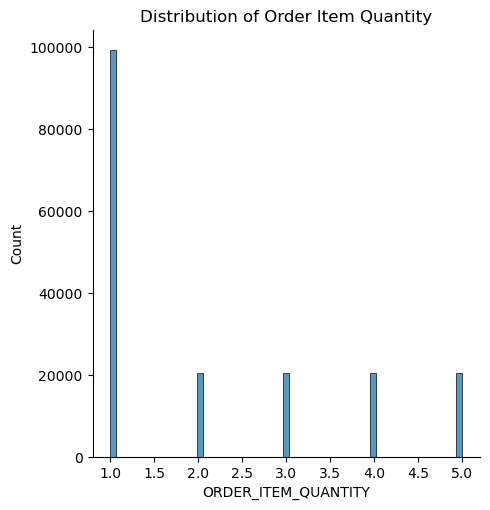

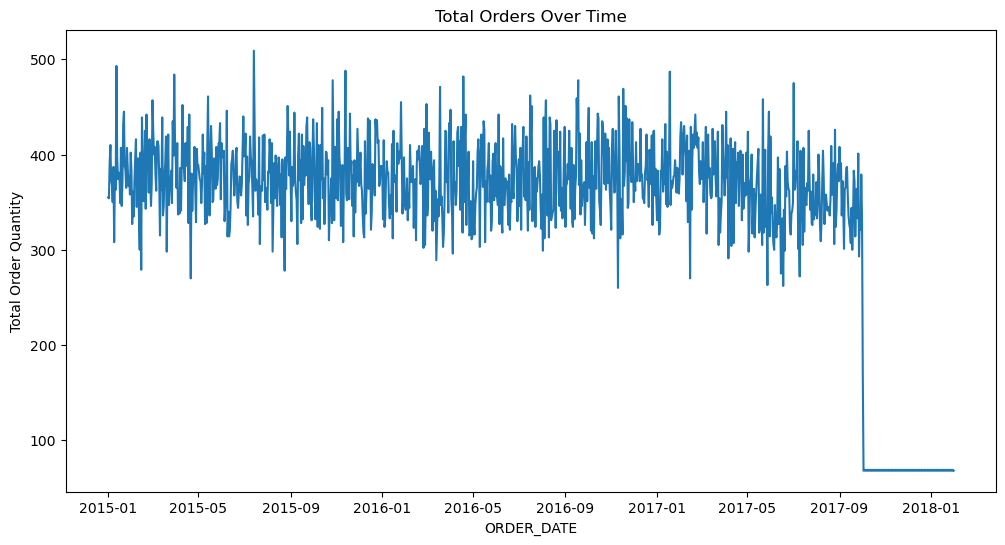

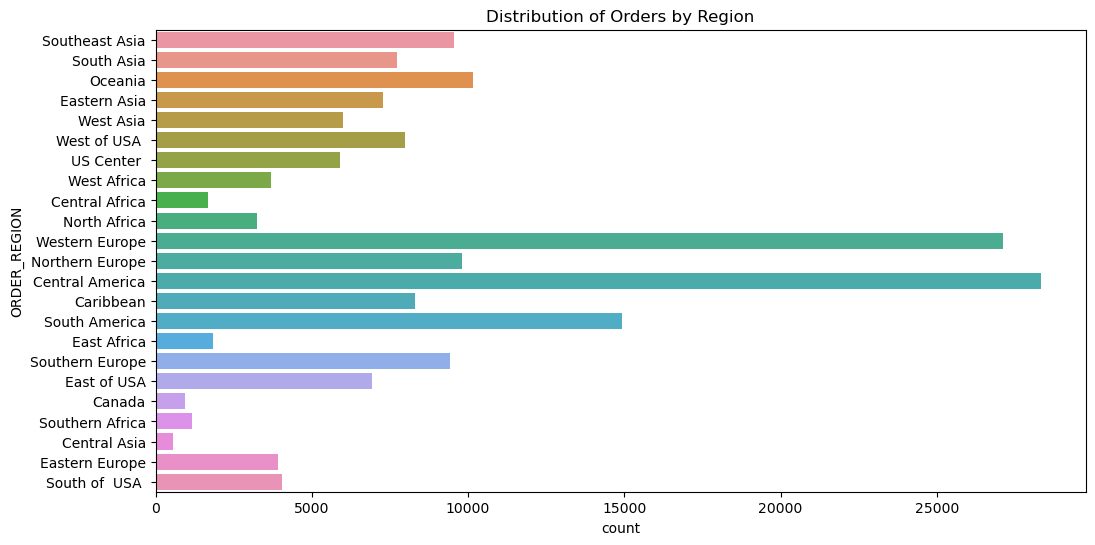

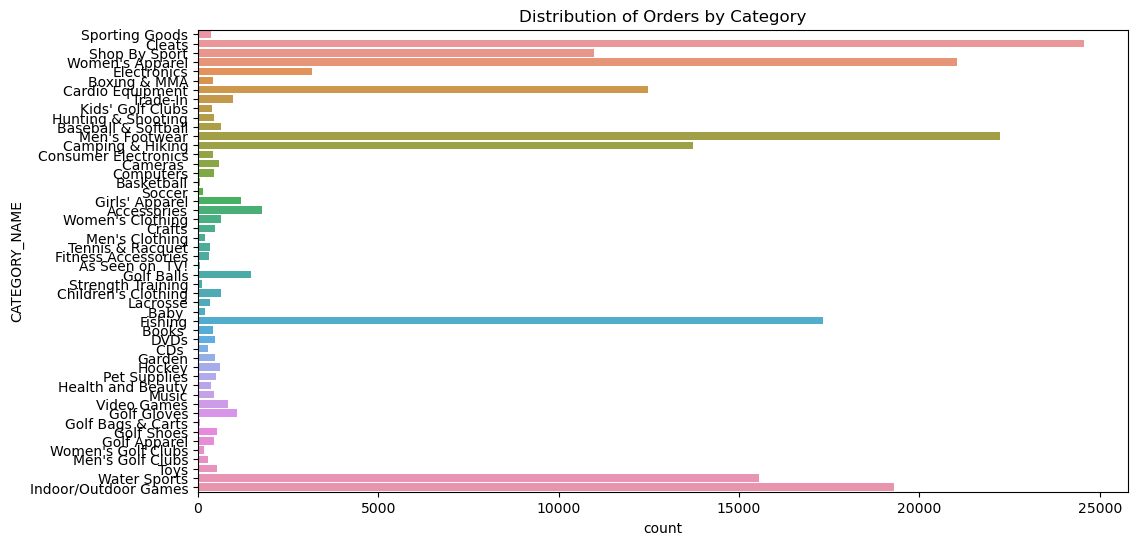

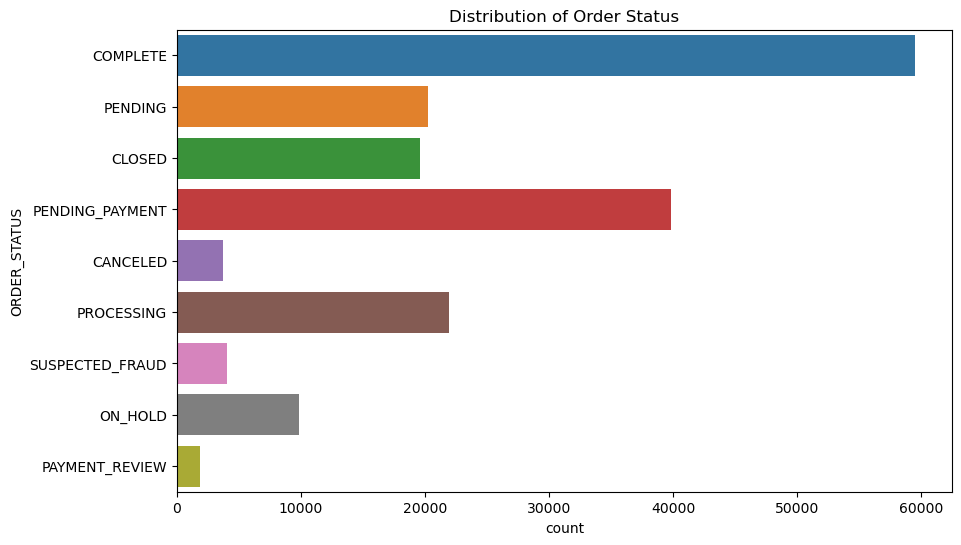

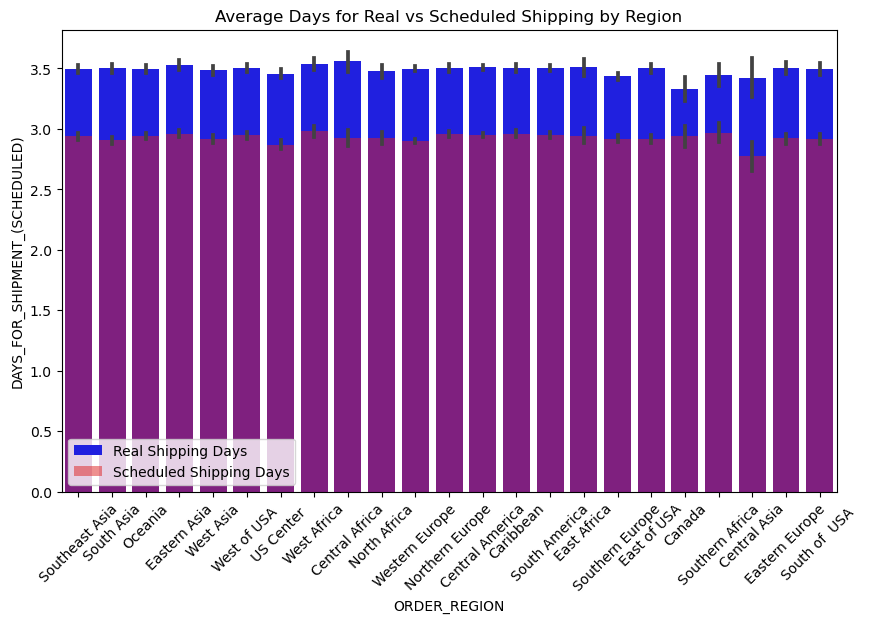

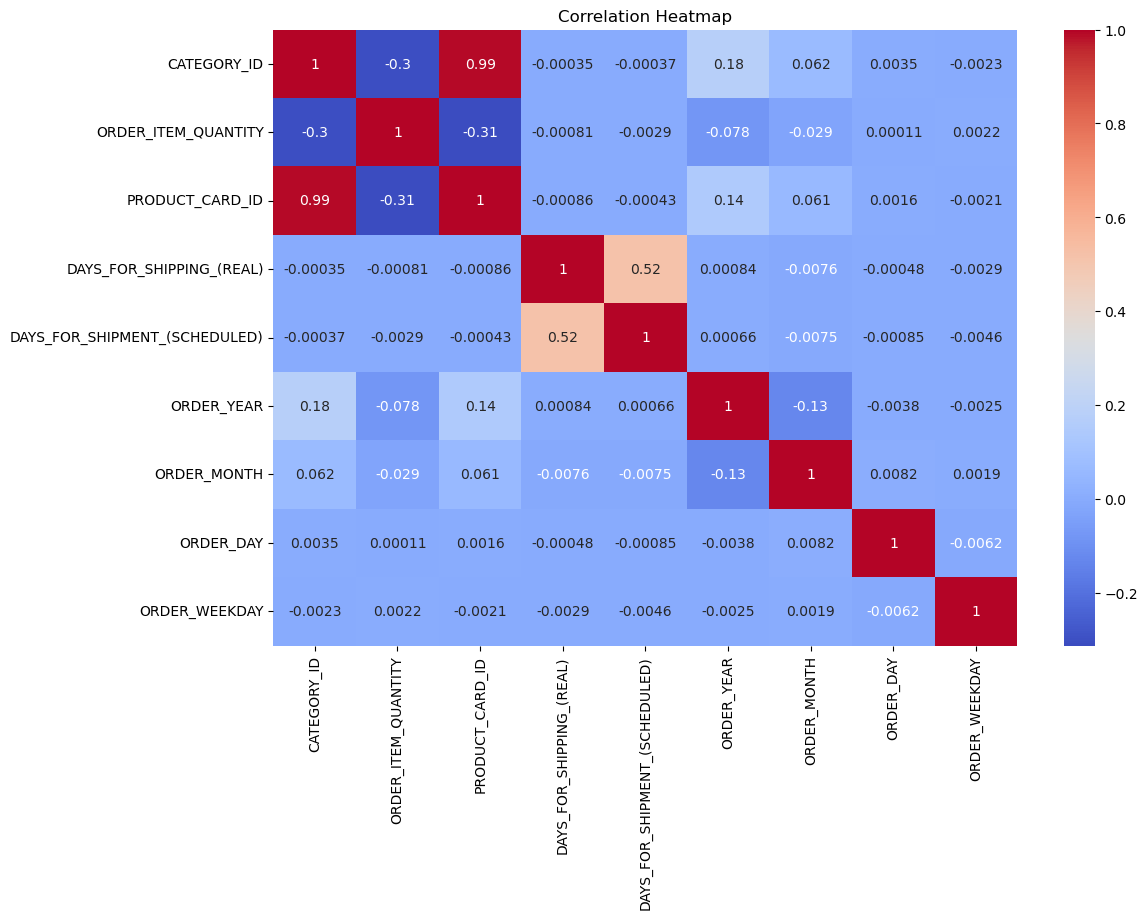

In [11]:

# Distribution of ORDER_ITEM_QUANTITY
plt.figure(figsize=(10, 6))
sns.displot(dataco_supply_chain['ORDER_ITEM_QUANTITY'])
plt.title('Distribution of Order Item Quantity')
plt.show()

# Orders over time
plt.figure(figsize=(12, 6))
dataco_supply_chain.groupby('ORDER_DATE')['ORDER_ITEM_QUANTITY'].sum().plot()
plt.title('Total Orders Over Time')
plt.ylabel('Total Order Quantity')
plt.show()

# Distribution of orders by region
plt.figure(figsize=(12, 6))
sns.countplot(data=dataco_supply_chain, y='ORDER_REGION')
plt.title('Distribution of Orders by Region')
plt.show()

# Distribution of orders by category
plt.figure(figsize=(12, 6))
sns.countplot(data=dataco_supply_chain, y='CATEGORY_NAME')
plt.title('Distribution of Orders by Category')
plt.show()

# Distribution of order status
plt.figure(figsize=(10, 6))
sns.countplot(data=dataco_supply_chain, y='ORDER_STATUS')
plt.title('Distribution of Order Status')
plt.show()

# Average days for real shipping vs scheduled shipping
plt.figure(figsize=(10, 6))
sns.barplot(data=dataco_supply_chain, x='ORDER_REGION', y='DAYS_FOR_SHIPPING_(REAL)', color='blue', label='Real Shipping Days')
sns.barplot(data=dataco_supply_chain, x='ORDER_REGION', y='DAYS_FOR_SHIPMENT_(SCHEDULED)', color='red', alpha=0.5, label='Scheduled Shipping Days')
plt.title('Average Days for Real vs Scheduled Shipping by Region')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(dataco_supply_chain.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


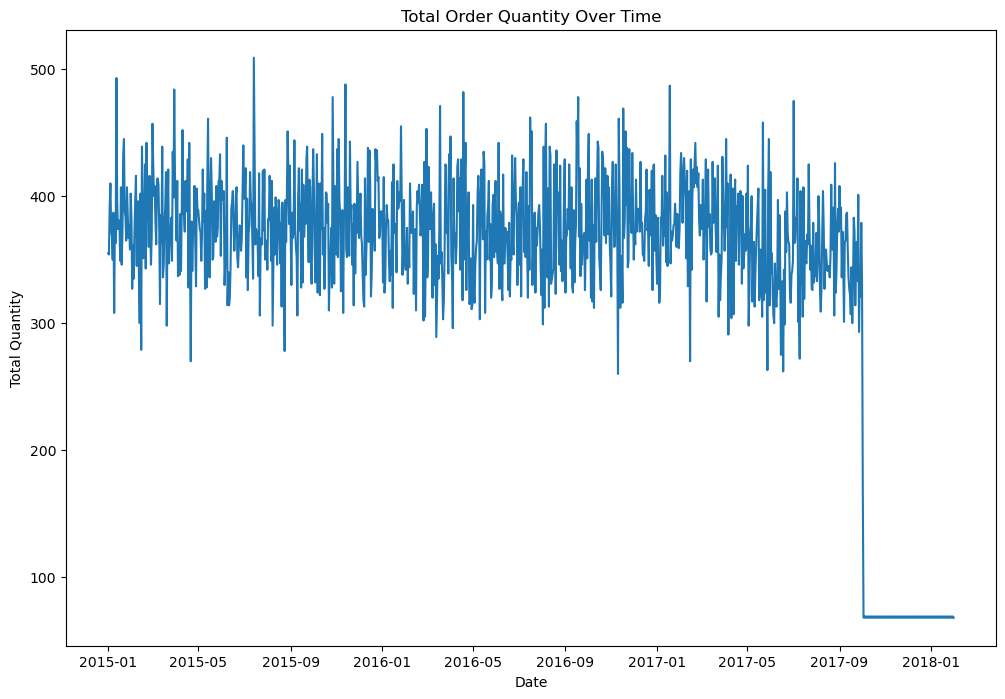

In [12]:
# Orders over time
plt.figure(figsize=(12, 8))
daily_orders = dataco_supply_chain.groupby(['ORDER_DATE'])['ORDER_ITEM_QUANTITY'].sum().reset_index()
sns.lineplot(data=daily_orders, x='ORDER_DATE', y='ORDER_ITEM_QUANTITY')
plt.title('Total Order Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.show()

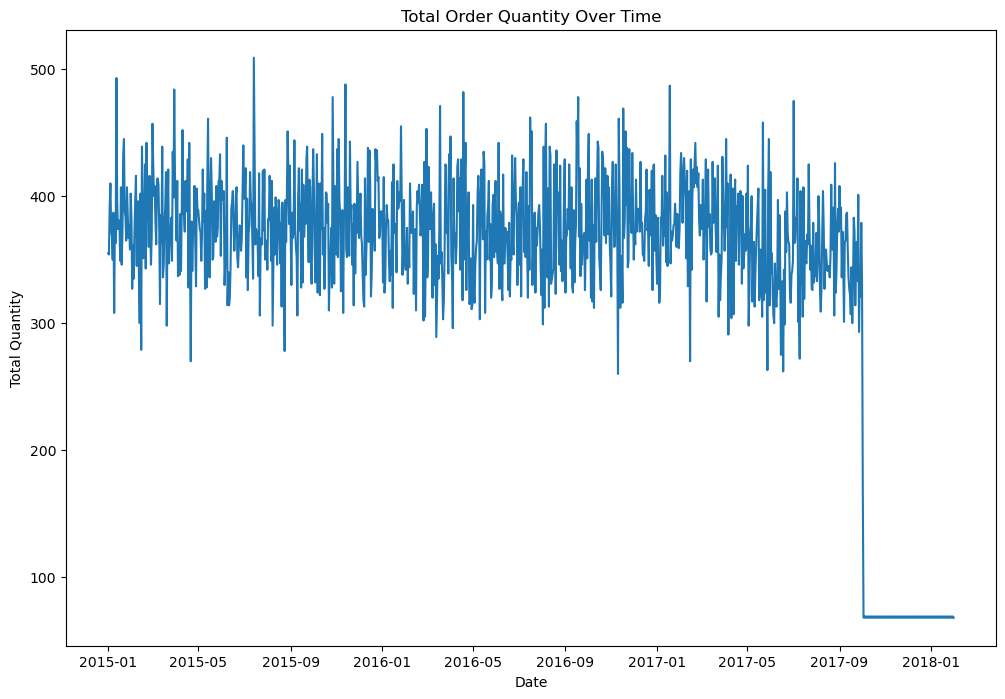

In [13]:
# Orders over time - filter out last dates
plt.figure(figsize=(12, 8))
filtered_daily_orders = daily_orders.copy()
#filtered_daily_orders = daily_orders[(daily_orders['ORDER_DATE'] <= pd.to_datetime('2017-07-01'))]
sns.lineplot(data=filtered_daily_orders, x='ORDER_DATE', y='ORDER_ITEM_QUANTITY')
plt.title('Total Order Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.show()

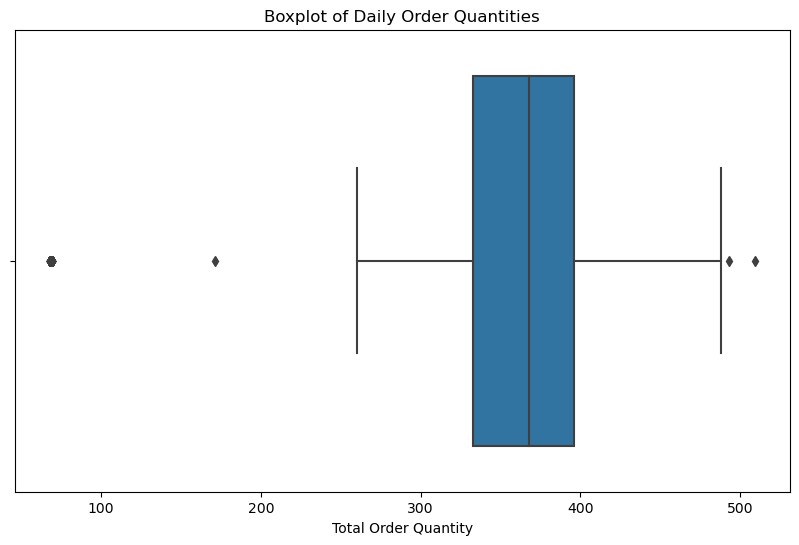

In [14]:
# Boxplot for daily order quantities
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_daily_orders['ORDER_ITEM_QUANTITY'])
plt.title('Boxplot of Daily Order Quantities')
plt.xlabel('Total Order Quantity')
plt.show()

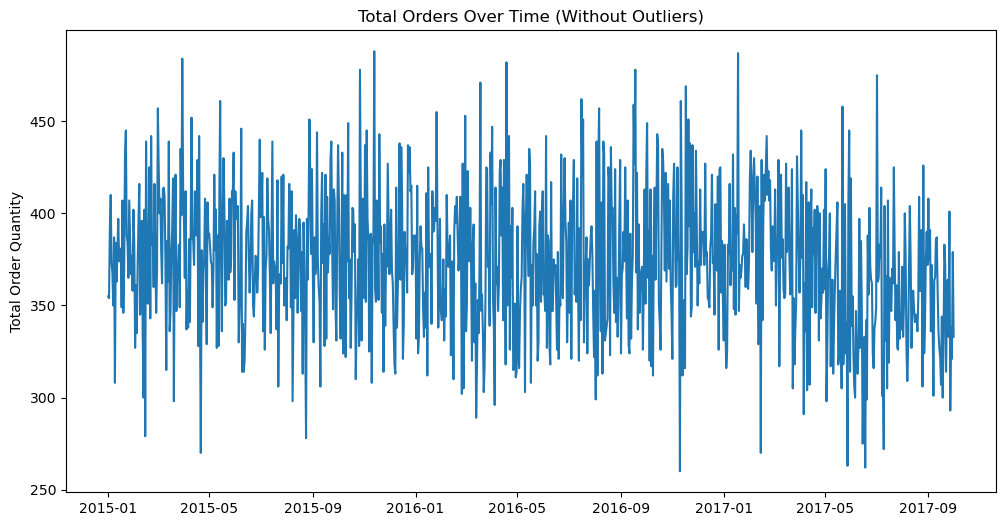

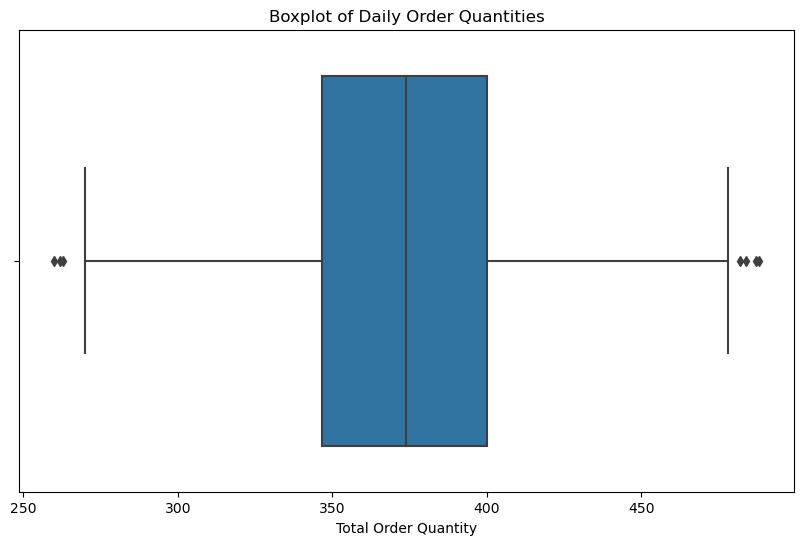

In [15]:
# remove outliers
# Aggregate order quantities by date

# Calculate Q1, Q3, and IQR
Q1 = filtered_daily_orders['ORDER_ITEM_QUANTITY'].quantile(0.25)
Q3 = filtered_daily_orders['ORDER_ITEM_QUANTITY'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
cleaned_daily_orders = filtered_daily_orders[(filtered_daily_orders['ORDER_ITEM_QUANTITY'] >= lower_bound) & 
                               (filtered_daily_orders['ORDER_ITEM_QUANTITY'] <= upper_bound)]

# Plotting the time series without outliers
plt.figure(figsize=(12, 6))
plt.plot(cleaned_daily_orders['ORDER_DATE'], cleaned_daily_orders['ORDER_ITEM_QUANTITY'])
plt.title('Total Orders Over Time (Without Outliers)')
plt.ylabel('Total Order Quantity')
plt.show()

# Boxplot for daily order quantities
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_daily_orders['ORDER_ITEM_QUANTITY'])
plt.title('Boxplot of Daily Order Quantities')
plt.xlabel('Total Order Quantity')
plt.show()

In [16]:
# create monthly, weekly data
cleaned_daily_orders = cleaned_daily_orders.copy()
cleaned_daily_orders['ORDER_DATE'] = pd.to_datetime(cleaned_daily_orders['ORDER_DATE'])
cleaned_daily_orders['YEAR_MONTH']=cleaned_daily_orders['ORDER_DATE'].dt.to_period('M')
cleaned_daily_orders['YEAR_WEEK']=cleaned_daily_orders['ORDER_DATE'].dt.to_period('W')
cleaned_daily_orders

,ORDER_DATE,ORDER_ITEM_QUANTITY,YEAR_MONTH,YEAR_WEEK
0,2015-01-01,355,2015-01,2014-12-29/2015-01-04
1,2015-01-02,354,2015-01,2014-12-29/2015-01-04
2,2015-01-03,392,2015-01,2014-12-29/2015-01-04
3,2015-01-04,410,2015-01,2014-12-29/2015-01-04
4,2015-01-05,373,2015-01,2015-01-05/2015-01-11
...,...,...,...,...
1000,2017-09-27,293,2017-09,2017-09-25/2017-10-01
1001,2017-09-28,338,2017-09,2017-09-25/2017-10-01
1002,2017-09-29,321,2017-09,2017-09-25/2017-10-01
1003,2017-09-30,379,2017-09,2017-09-25/2017-10-01


In [17]:
cleaned_daily_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1004
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ORDER_DATE           1003 non-null   datetime64[ns]
 1   ORDER_ITEM_QUANTITY  1003 non-null   int64         
 2   YEAR_MONTH           1003 non-null   period[M]     
 3   YEAR_WEEK            1003 non-null   period[W-SUN] 
dtypes: datetime64[ns](1), int64(1), period[M](1), period[W-SUN](1)
memory usage: 39.2 KB


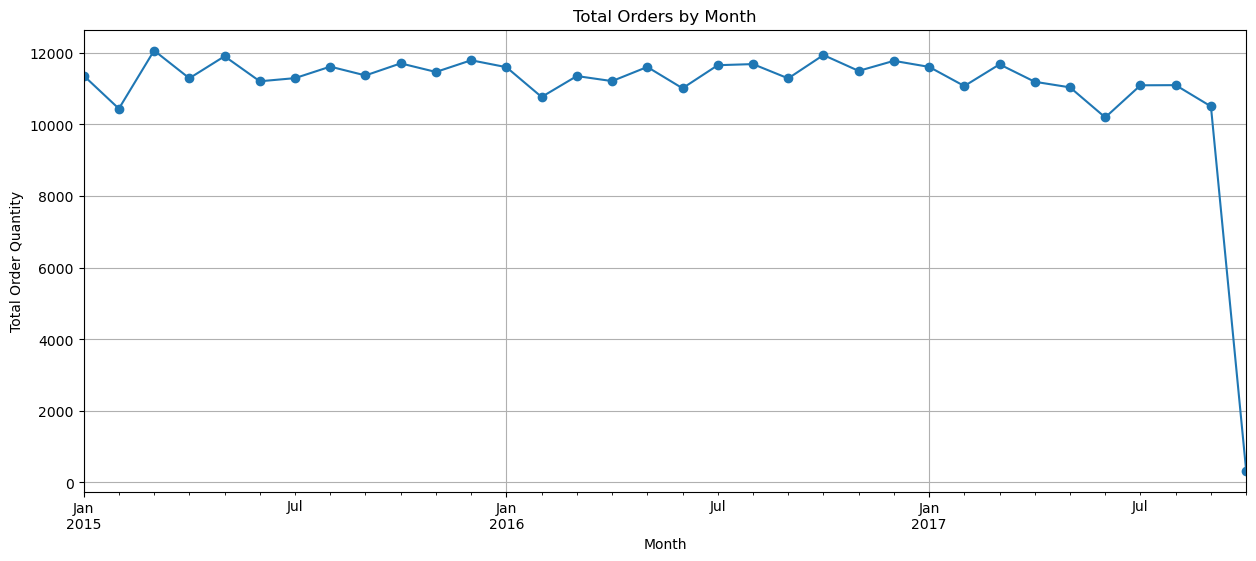

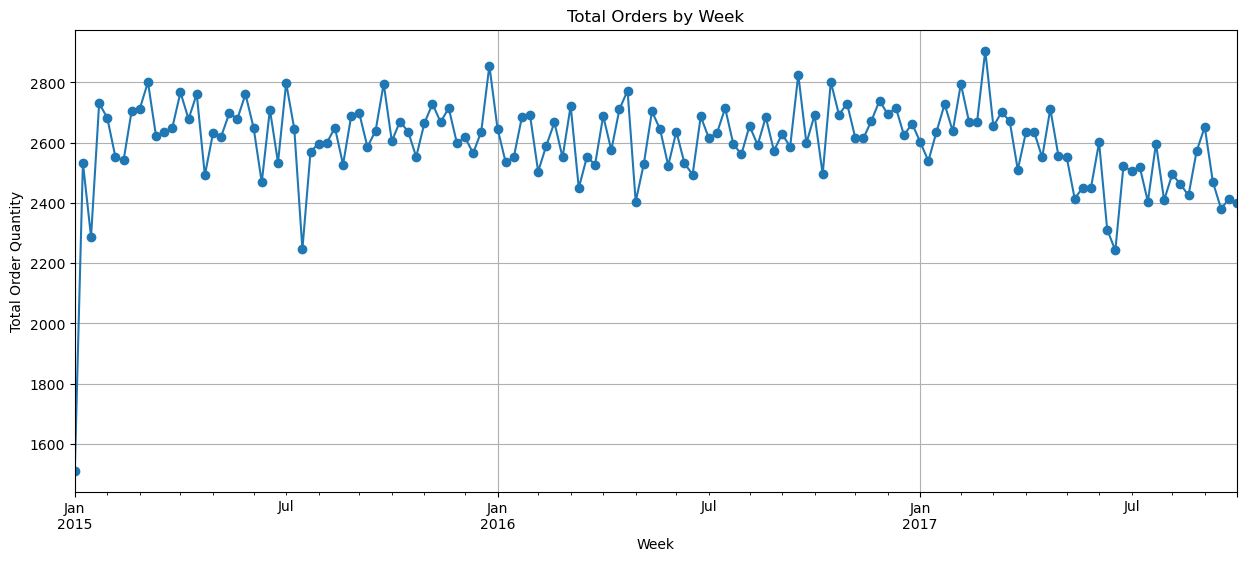

In [18]:
# Group by 'year-month' and sum the ORDER_ITEM_QUANTITY
monthly_orders = cleaned_daily_orders.groupby('YEAR_MONTH')['ORDER_ITEM_QUANTITY'].sum()
weekly_orders = cleaned_daily_orders.groupby('YEAR_WEEK')['ORDER_ITEM_QUANTITY'].sum()

# Plot
plt.figure(figsize=(15, 6))
monthly_orders.plot(kind='line', marker='o')
plt.title('Total Orders by Month')
plt.ylabel('Total Order Quantity')
plt.xlabel('Month')
plt.grid(True)
plt.show()

# Plot
plt.figure(figsize=(15, 6))
weekly_orders.plot(kind='line', marker='o')
plt.title('Total Orders by Week')
plt.ylabel('Total Order Quantity')
plt.xlabel('Week')
plt.grid(True)
plt.show()

In [19]:
weekly_orders.info()

<class 'pandas.core.series.Series'>
PeriodIndex: 144 entries, 2014-12-29/2015-01-04 to 2017-09-25/2017-10-01
Freq: W-SUN
Series name: ORDER_ITEM_QUANTITY
Non-Null Count  Dtype
--------------  -----
144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


## Demand Forecasting
Using prophet

In [20]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [21]:
from prophet import Prophet

#### Weekly

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Convert the series to a DataFrame
weekly_orders_df = weekly_orders.reset_index()
weekly_orders_df.columns = ['ds', 'y']

# Convert the 'ds' column to datetime format
weekly_orders_df['ds'] = weekly_orders_df['ds'].dt.to_timestamp()

# Split the data (holding out the last 20% for testing)
split_point = int(len(weekly_orders_df) * 0.80)
train = weekly_orders_df.iloc[:split_point]
test = weekly_orders_df.iloc[split_point:]

# Initialize and fit the Prophet model
weekly_model = Prophet()
weekly_model.fit(train)

# Create future dates for prediction (entire duration: train + test)
weekly_future = weekly_model.make_future_dataframe(periods=len(test), freq='W-SUN')

# Predict
weekly_forecast = weekly_model.predict(weekly_future)


03:33:18 - cmdstanpy - INFO - Chain [1] start processing
03:33:18 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
# Evaluate on Training data
y_pred_train = weekly_forecast['yhat'][:split_point]
mae_train = mean_absolute_error(train['y'], y_pred_train)
mse_train = mean_squared_error(train['y'], y_pred_train)
rmse_train = np.sqrt(mse_train)

print(f"Training MAE: {mae_train}")
print(f"Training MSE: {mse_train}")
print(f"Training RMSE: {rmse_train}")

# Evaluate on Testing data
y_pred_test = weekly_forecast['yhat'][split_point:]
mae_test = mean_absolute_error(test['y'], y_pred_test)
mse_test = mean_squared_error(test['y'], y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f"\nTesting MAE: {mae_test}")
print(f"Testing MSE: {mse_test}")
print(f"Testing RMSE: {rmse_test}")


Training MAE: 80.77276513768548
Training MSE: 14966.830617894953
Training RMSE: 122.33899876120842

Testing MAE: 173.65052098157162
Testing MSE: 41813.56052762466
Testing RMSE: 204.48364366771406


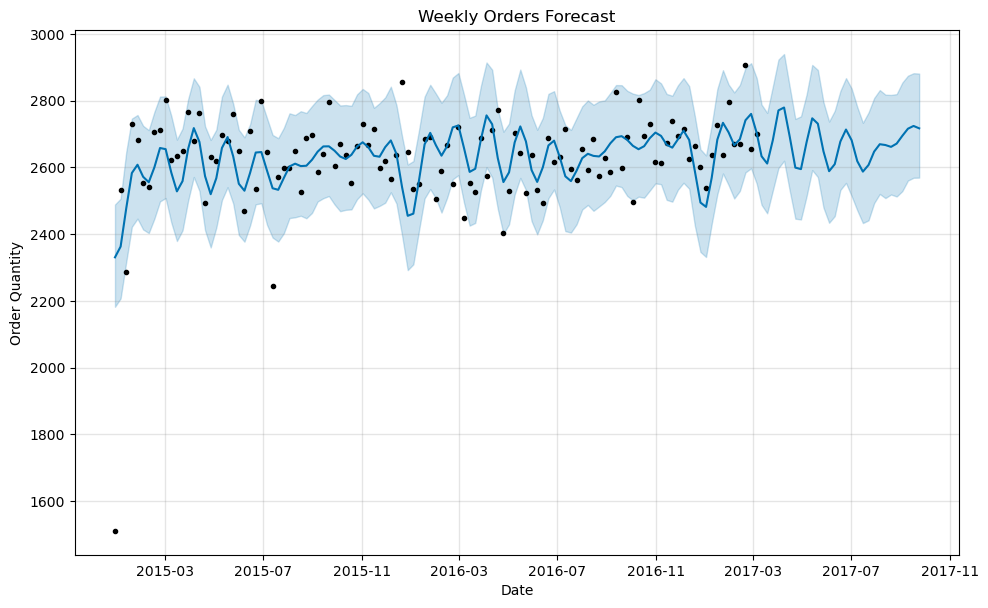

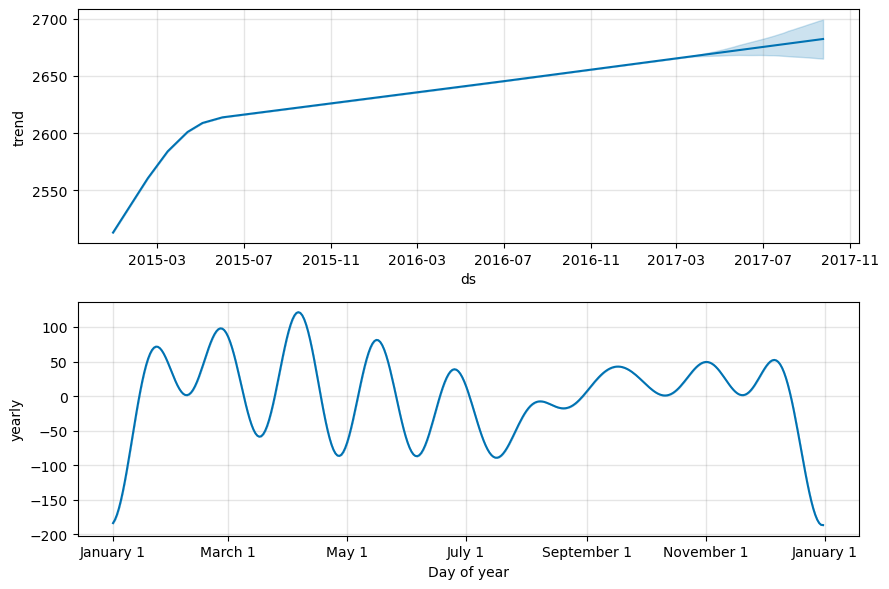

In [24]:

# Plot the forecast
weekly_fig1 = weekly_model.plot(weekly_forecast)
plt.title('Weekly Orders Forecast')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.show()

# If you want to see the components of the forecast (trend, yearly seasonality, etc.)
weekly_fig2 = weekly_model.plot_components(weekly_forecast)

#### Visualize actual versus predicted values.

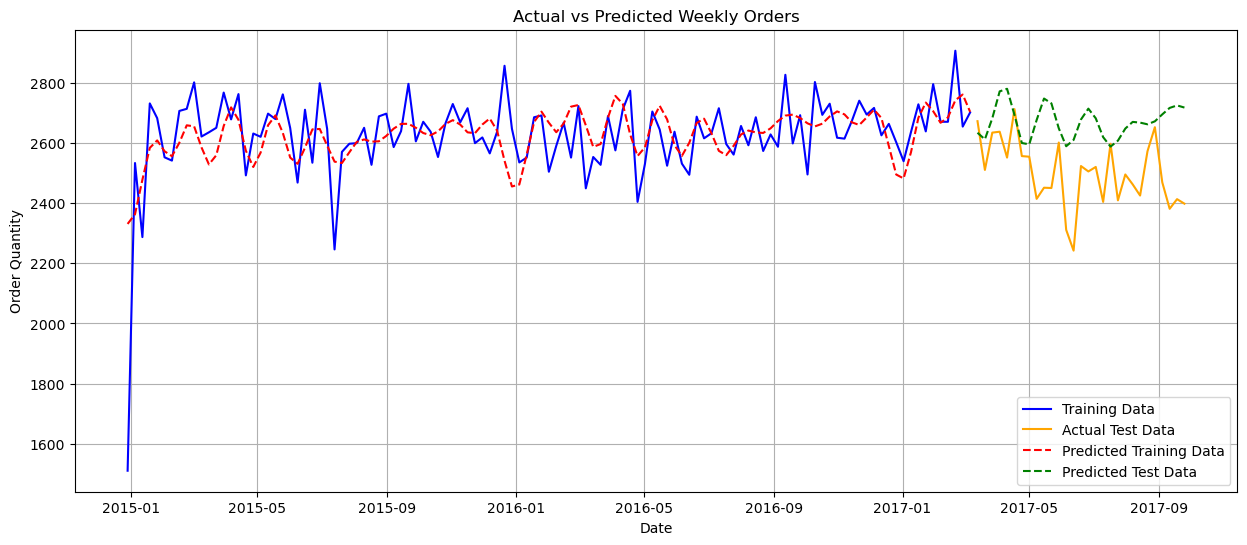

In [25]:
# Plotting actual vs predicted values
plt.figure(figsize=(15, 6))
plt.plot(train['ds'], train['y'], label='Training Data', color='blue')
plt.plot(test['ds'], test['y'], label='Actual Test Data', color='orange')
plt.plot(train['ds'], y_pred_train, label='Predicted Training Data', color='red', linestyle='--')
plt.plot(test['ds'], y_pred_test, label='Predicted Test Data', color='green', linestyle='--')
plt.title('Actual vs Predicted Weekly Orders')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
weekly_orders_df.describe()

,y
count,144.000000
mean,2601.513889
std,147.965881
min,1511.000000
25%,2538.000000
50%,2626.500000
75%,2687.250000
max,2906.000000


* Mean Absolute Error (MAE): The model's predictions deviate by an average of 173.65 units from the actual weekly orders. Given the average weekly orders of 2,601, this represents an error of about 6.7%.

* Root Mean Squared Error (RMSE): The RMSE of 204.48 suggests that there are instances where the model's predictions have larger deviations from the actual values. This is slightly higher than the standard deviation of the data, indicating the model might be missing some variability.

To enhance the model's accuracy, we can consider checking stationarity of the data, incorporating additional factors, tuning hyperparameters, or comparing exploring other forecasting methods.

## Inventory Management
The demand forecasting model can be used to implement inventory management system.

Here is a simple implementation.   

This has not been optimized or analyzed. This is only for the purpose of show how the demand forecast can be used for inventory management.

#### Safety Stock and Reorder Point

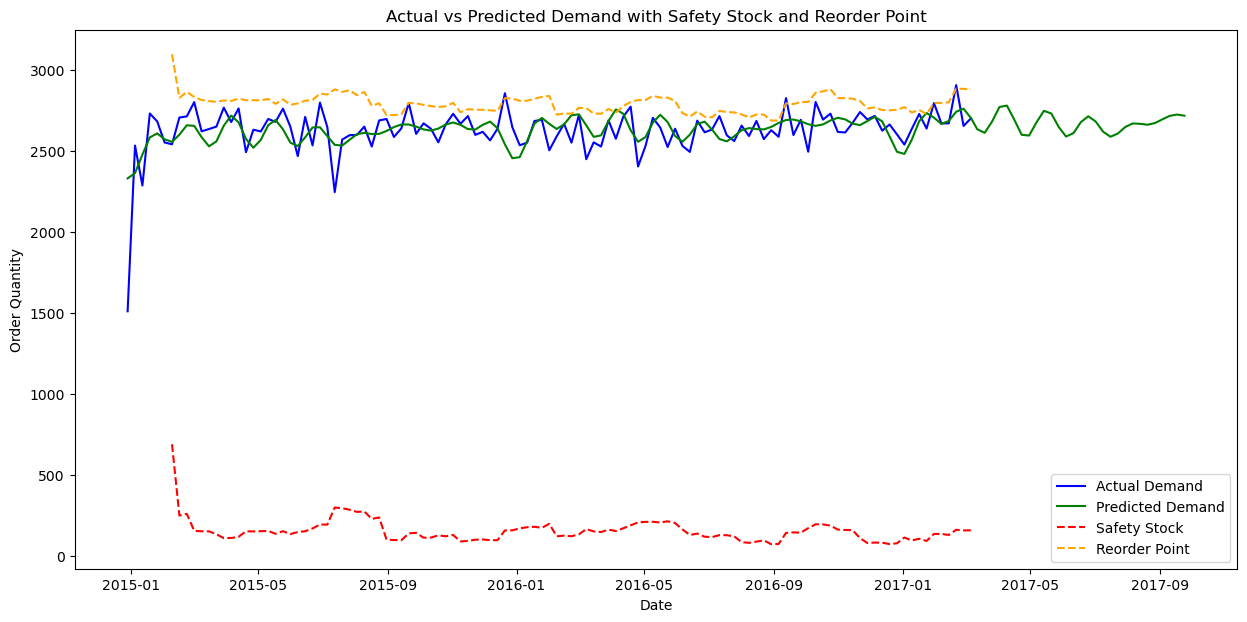

In [27]:
import matplotlib.pyplot as plt

# Merge 'y' values from train and test into weekly_forecast
weekly_forecast = weekly_forecast.merge(train[['ds', 'y']], on='ds', how='left')
weekly_forecast = weekly_forecast.merge(test[['ds', 'y']], on='ds', how='left', suffixes=('', '_test'))
weekly_forecast['y'].fillna(weekly_forecast['y_test'], inplace=True)
weekly_forecast.drop(columns='y_test', inplace=True)

# Calculate weekly standard deviation of actual demand
weekly_forecast['std_dev'] = weekly_forecast['y'].rolling(window=7).std()

# Calculate weekly safety stock
weekly_forecast['safety_stock'] = 1.65 * weekly_forecast['std_dev'] * np.sqrt(1)

# Calculate weekly average demand from actual data
weekly_forecast['avg_weekly_demand'] = weekly_forecast['y'].rolling(window=7).mean()

# Calculate weekly reorder point
weekly_forecast['reorder_point'] = (weekly_forecast['avg_weekly_demand'] * 1) + weekly_forecast['safety_stock']

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(weekly_forecast['ds'], weekly_forecast['y'], label='Actual Demand', color='blue')
plt.plot(weekly_forecast['ds'], weekly_forecast['yhat'], label='Predicted Demand', color='green')
plt.plot(weekly_forecast['ds'], weekly_forecast['safety_stock'], label='Safety Stock', color='red', linestyle='--')
plt.plot(weekly_forecast['ds'], weekly_forecast['reorder_point'], label='Reorder Point', color='orange', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Demand with Safety Stock and Reorder Point')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.show()

#### With Forecasted Safety Stock and Reorder Point

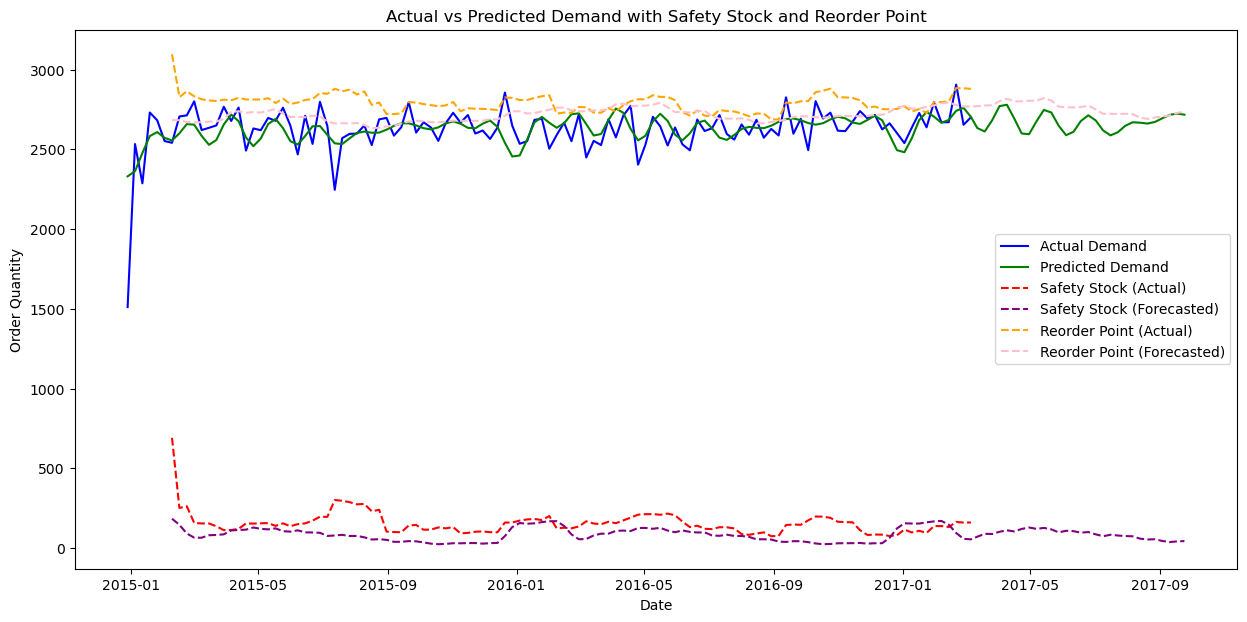

In [28]:

# Calculate weekly standard deviation of forecasted demand
weekly_forecast['forecasted_std_dev'] = weekly_forecast['yhat'].rolling(window=7).std()

# Calculate weekly safety stock for forecasted demand
weekly_forecast['forecasted_safety_stock'] = 1.65 * weekly_forecast['forecasted_std_dev'] * np.sqrt(1)

# Calculate weekly average demand from forecasted data
weekly_forecast['forecasted_avg_weekly_demand'] = weekly_forecast['yhat'].rolling(window=7).mean()

# Calculate weekly reorder point for forecasted demand
weekly_forecast['forecasted_reorder_point'] = (weekly_forecast['forecasted_avg_weekly_demand'] * 1) + weekly_forecast['forecasted_safety_stock']

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(weekly_forecast['ds'], weekly_forecast['y'], label='Actual Demand', color='blue')
plt.plot(weekly_forecast['ds'], weekly_forecast['yhat'], label='Predicted Demand', color='green')
plt.plot(weekly_forecast['ds'], weekly_forecast['safety_stock'], label='Safety Stock (Actual)', color='red', linestyle='--')
plt.plot(weekly_forecast['ds'], weekly_forecast['forecasted_safety_stock'], label='Safety Stock (Forecasted)', color='purple', linestyle='--')
plt.plot(weekly_forecast['ds'], weekly_forecast['reorder_point'], label='Reorder Point (Actual)', color='orange', linestyle='--')
plt.plot(weekly_forecast['ds'], weekly_forecast['forecasted_reorder_point'], label='Reorder Point (Forecasted)', color='pink', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Demand with Safety Stock and Reorder Point')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.show()